## 1. Defining the Question

> ### a) Specifying the Question

> **Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the <a href='http://bit.ly/hypothyroid_data'>healthcare datasets</a> provided to accomplish the following:**  

> **Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.**

> ### b) Defining the Metric for Success

#### <b>Decision trees</b>

**For this section we are going to build a model that makes the above prediction using Random Forest and Gradient Boosting**

**We will try and optimize noth models while trying to identify the features that have the most impact in influencing the prediction**


#### <b>Support Vector Machines</b>

**In this section we will apply Polynomial, linear and rbf kernel function to build our SVM model and then evaluate their performance and pick the kernel that performs the best.**

> ### c) Understanding the context 

> **Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.**

> **Hypothyroidism may not cause noticeable symptoms in the early stages. Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.**

> ### d) Recording the Experimental Design

> **Exploratory data Analysis**

> **Feature Engineering**

> **Modelling**

> ### e) Data Relevance

#### <b>Dataset Columns</b>

> ***Age***

> ***Sex***

> ***on_thyroxine***

> ***query_on_thyroxine***

> ***on_antithyroid_medicationthyroid_surgery***

> ***query_hypothyroid***

> ***query_hyperthyroid***

> ***pregnant***

> ***sick***

> ***tumor***

> ***lithium***

> ***goitre***

> ***TSH_measured***

> ***TSH***

> ***T3_measured***

> ***T3***

> ***TT4_measured***

> ***TT4***

### 2) Reading the Data

In [0]:
# Import the necessary libraries
#
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.2)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [515]:
hypoT = pd.read_csv("hypothyroid.csv")
hypoT.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [516]:
# getting a brief description of our data.
#
hypoT.describe().T

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


In [517]:
# Check the column names of our dataset
#
hypoT.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [518]:
# get the data types of the variables
#
hypoT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

***We can clear see that our dataset does not have any numerical column and all the columns are of object datatype.***

In [519]:
# Create a list of the categorical columns
#
cat = [col for col in hypoT.columns if (hypoT[col].dtype=='object')]
cat

['status',
 'age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'TBG_measured',
 'TBG']

In [520]:
# Get the unique values from our status column
#
hypoT['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [521]:
# Get the sie of our dataframe
#
hypoT.shape

(3163, 26)

### External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. 
External validation can often be as simple as checking your data against a single number, as we will do here.

### Data cleaning

In [522]:
# Check for missing values
#
hypoT.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

***Our dataset has no null values***

In [523]:
# Check for duplicated values.
#
hypoT.duplicated().sum()

77

In [524]:
# Drop duplicated values
#
hypoT.drop_duplicates(inplace=True)

# Check for duplicated values.
#
hypoT.duplicated().sum()

0

In [525]:
hypoT.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


**I noticed that some of the columns had question marks as the values.**

**I calculated the total number of rows that had '?' values.**

In [526]:
cols = ['age','T3','TT4','T4U','TSH','FTI','TBG']

for i, val in enumerate(cols):
  t3 = hypoT[hypoT[val] == '?']
  print(f"Col 1: {t3[val].value_counts()}")

Col 1: ?    438
Name: age, dtype: int64
Col 1: ?    680
Name: T3, dtype: int64
Col 1: ?    240
Name: TT4, dtype: int64
Col 1: ?    239
Name: T4U, dtype: int64
Col 1: ?    455
Name: TSH, dtype: int64
Col 1: ?    238
Name: FTI, dtype: int64
Col 1: ?    2835
Name: TBG, dtype: int64


***We clearly see some of the columns have question marks(?) as values which will hinder the process of creating our model.***

In [0]:
# Identify all rows with ? and replace the values to nan
#
hypoT.replace('?',np.nan,inplace=True)

In [0]:
# convert the columns from object to numerical
#
hypoT[cols] = hypoT[cols].apply(pd.to_numeric)

In [0]:
#Fill missing values with the mean
#

from sklearn.impute import SimpleImputer

missing = SimpleImputer(strategy ='mean')
hypoT[cols] = missing.fit_transform(hypoT[cols])

In [530]:
hypoT.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
TBG                           0
dtype: int64

In [0]:
hypoT.dropna(inplace=True)

**Dict Vectorization**

In [532]:
# First, we need to convert the dataframe into a dictionary.
# This can be achieved by Pandas to_dict method.
#

X = hypoT.iloc[:, 1:]

df_dict = X.to_dict(orient='records') # turn each row as key-value pairs.

print(f" Dictionary created: {df_dict}")
# The orient='records' is required to turn the data frame 
# into a {column:value} format.

 Dictionary created: [{'age': 72.0, 'sex': 'M', 'on_thyroxine': 'f', 'query_on_thyroxine': 'f', 'on_antithyroid_medication': 'f', 'thyroid_surgery': 'f', 'query_hypothyroid': 'f', 'query_hyperthyroid': 'f', 'pregnant': 'f', 'sick': 'f', 'tumor': 'f', 'lithium': 'f', 'goitre': 'f', 'TSH_measured': 'y', 'TSH': 30.0, 'T3_measured': 'y', 'T3': 0.6, 'TT4_measured': 'y', 'TT4': 15.0, 'T4U_measured': 'y', 'T4U': 1.48, 'FTI_measured': 'y', 'FTI': 10.0, 'TBG_measured': 'n', 'TBG': 31.07011952191235}, {'age': 15.0, 'sex': 'F', 'on_thyroxine': 't', 'query_on_thyroxine': 'f', 'on_antithyroid_medication': 'f', 'thyroid_surgery': 'f', 'query_hypothyroid': 'f', 'query_hyperthyroid': 'f', 'pregnant': 'f', 'sick': 'f', 'tumor': 'f', 'lithium': 'f', 'goitre': 'f', 'TSH_measured': 'y', 'TSH': 145.0, 'T3_measured': 'y', 'T3': 1.7, 'TT4_measured': 'y', 'TT4': 19.0, 'T4U_measured': 'y', 'T4U': 1.13, 'FTI_measured': 'y', 'FTI': 17.0, 'TBG_measured': 'n', 'TBG': 31.07011952191235}, {'age': 24.0, 'sex': 'M', '

In [0]:
# Now we instantiate a DictVectorizer:
#
from sklearn.feature_extraction import DictVectorizer

# instantiate a dictvectorizer object for df

dv_df = DictVectorizer(sparse=False)
# sparse = False output an array not a sparse matrix

In [534]:
# Apply the dv_df on the df_dict
#
df_encoded = dv_df.fit_transform(df_dict)
# Show encoded df
df_encoded

array([[ 10.,   0.,   1., ...,   0.,   1.,   0.],
       [ 17.,   0.,   1., ...,   0.,   1.,   0.],
       [  0.,   0.,   1., ...,   0.,   1.,   0.],
       ...,
       [104.,   0.,   1., ...,   0.,   1.,   0.],
       [137.,   0.,   1., ...,   0.,   1.,   0.],
       [143.,   0.,   1., ...,   0.,   1.,   0.]])

In [535]:
# Vocabulary
vocab = dv_df.vocabulary_

# Show vocabulary
vocab

{'FTI': 0,
 'FTI_measured=n': 1,
 'FTI_measured=y': 2,
 'T3': 3,
 'T3_measured=n': 4,
 'T3_measured=y': 5,
 'T4U': 6,
 'T4U_measured=n': 7,
 'T4U_measured=y': 8,
 'TBG': 9,
 'TBG_measured=n': 10,
 'TBG_measured=y': 11,
 'TSH': 12,
 'TSH_measured=n': 13,
 'TSH_measured=y': 14,
 'TT4': 15,
 'TT4_measured=n': 16,
 'TT4_measured=y': 17,
 'age': 18,
 'goitre=f': 19,
 'goitre=t': 20,
 'lithium=f': 21,
 'lithium=t': 22,
 'on_antithyroid_medication=f': 23,
 'on_antithyroid_medication=t': 24,
 'on_thyroxine=f': 25,
 'on_thyroxine=t': 26,
 'pregnant=f': 27,
 'pregnant=t': 28,
 'query_hyperthyroid=f': 29,
 'query_hyperthyroid=t': 30,
 'query_hypothyroid=f': 31,
 'query_hypothyroid=t': 32,
 'query_on_thyroxine=f': 33,
 'query_on_thyroxine=t': 34,
 'sex=F': 35,
 'sex=M': 36,
 'sick=f': 37,
 'sick=t': 38,
 'thyroid_surgery=f': 39,
 'thyroid_surgery=t': 40,
 'tumor=f': 41,
 'tumor=t': 42}

***Each row represents a sample and each column represents a feature. If we want to know what feature for each column, we can check the vocabulary of this DictVectorizer:***

## 3) Exploratory Data Analysis

### Univariate Analysis

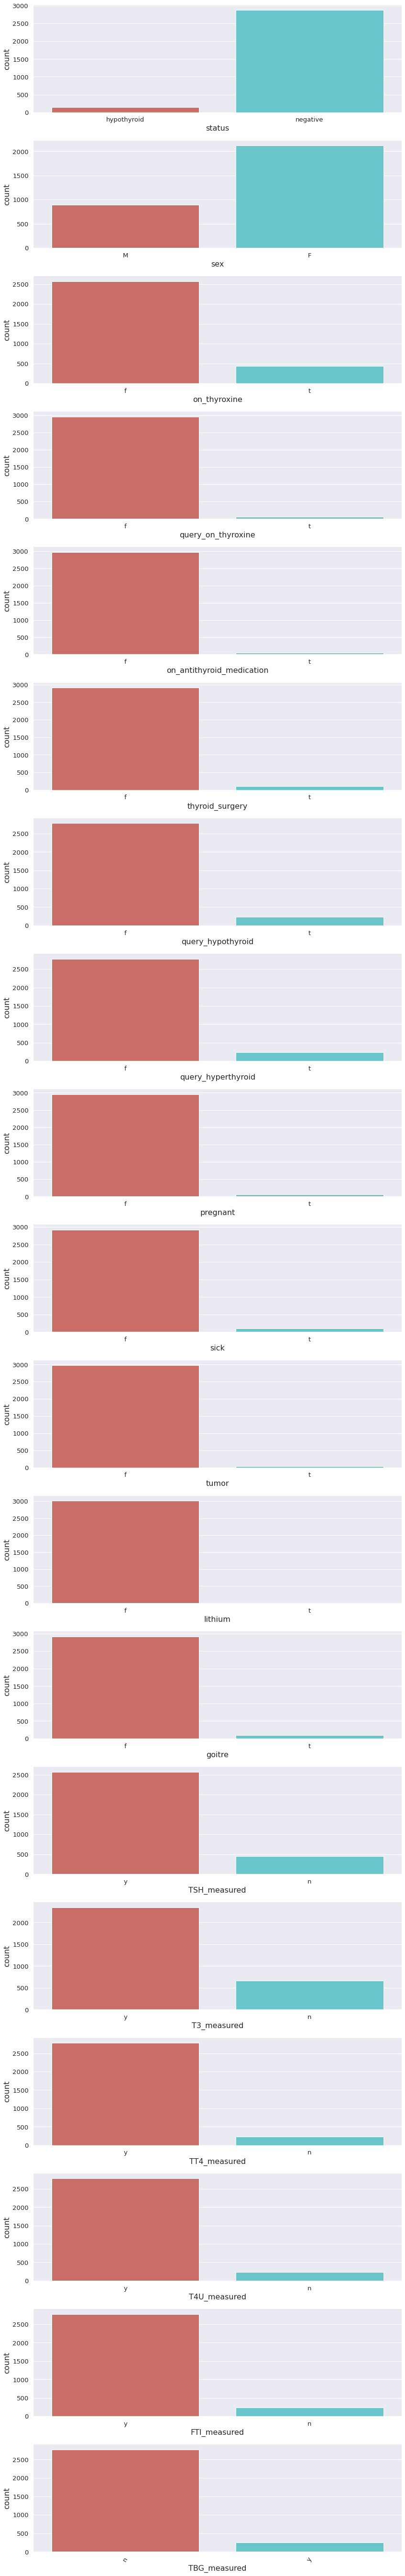

In [536]:
# Plot countplot frequencies of the numeric data
#
numeric = ['status', 'sex',\
           'on_thyroxine','query_on_thyroxine',\
           'on_antithyroid_medication',\
           'thyroid_surgery', 'query_hypothyroid',\
           'query_hyperthyroid','pregnant',\
           'sick', 'tumor','lithium', 'goitre',\
           'TSH_measured', 'T3_measured', 'TT4_measured',\
           'T4U_measured', 'FTI_measured', 'TBG_measured']
fig, ax = plt.subplots(len(numeric), figsize=(8,50))

for i,colval in enumerate(numeric):
  sns.countplot(hypoT[colval], ax=ax[i], palette='hls')
  ax[i].set_xlabel(colval, fontsize=16)
  ax[i].set_ylabel("count", fontsize=16)
  sns.despine()
  plt.xticks(rotation =60)
  plt.tight_layout(rect=(0, 0, 1.5, 1.5))

plt.show()

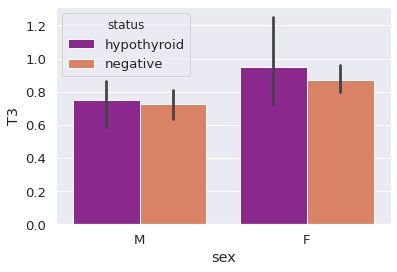

In [537]:
# change the estimator from mean to standard devaition 
sns.barplot(x ='sex', y ='T3', data = hypoT, hue='status', 
            palette ='plasma', estimator = np.std) 

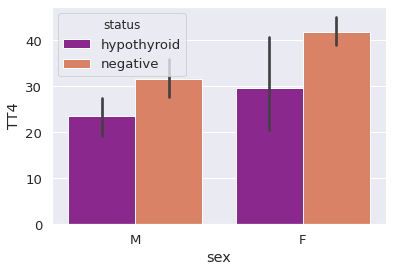

In [538]:
# change the estimator from mean to standard devaition 
sns.barplot(x ='sex', y ='TT4', data = hypoT, hue='status', 
            palette ='plasma', estimator = np.std) 

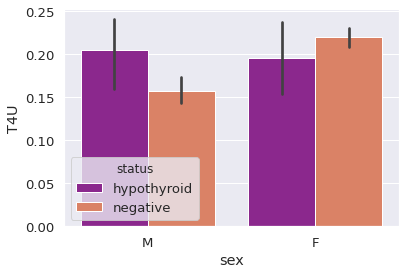

In [539]:
# change the estimator from mean to standard devaition 
sns.barplot(x ='sex', y ='T4U', data = hypoT, hue='status', 
            palette ='plasma', estimator = np.std) 

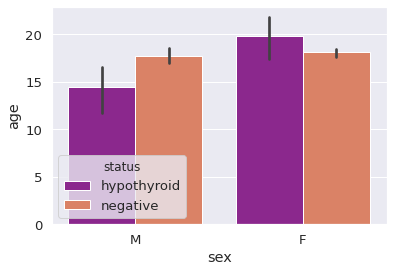

In [540]:
# change the estimator from mean to standard devaition 
sns.barplot(x ='sex', y ='age', data = hypoT, hue='status', 
            palette ='plasma', estimator = np.std) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


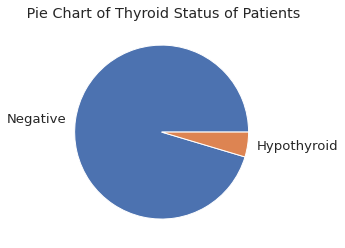

In [541]:
# Pie chart for status
#
y = hypoT['status'].value_counts()

status = pd.DataFrame(y)
labels = [ 'Negative', 'Hypothyroid']

plt.pie(status, labels=labels)
plt.title(" Pie Chart of Thyroid Status of Patients")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


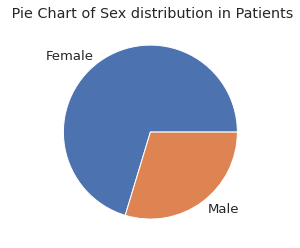

In [545]:
# Pie chart for status
#
x = hypoT['sex'].value_counts()
sex = pd.DataFrame(x)
labels = ['Female', 'Male']
plt.pie(sex, labels=labels)
plt.title(" Pie Chart of Sex distribution in Patients")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


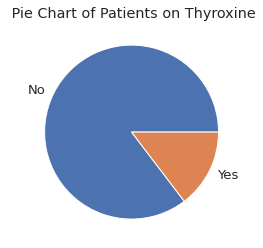

In [546]:
# Pie chart for status
#
x = hypoT['on_thyroxine'].value_counts()
tsh = pd.DataFrame(x)
labels = [ 'No', 'Yes']
plt.pie(tsh, labels=labels)
plt.title(" Pie Chart of Patients on Thyroxine")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


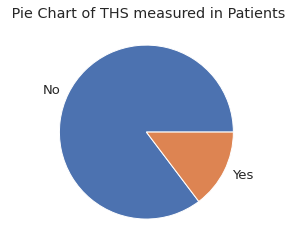

In [547]:
# Pie chart for status
#
x = hypoT['TSH_measured'].value_counts()
tsh = pd.DataFrame(x)
labels = ['No', 'Yes']
plt.pie(tsh, labels=labels)
plt.title(" Pie Chart of THS measured in Patients")
plt.show()

### Bivariate Analysis

In [548]:
# Checking for the correlation between our categorical variables.
#
cat = hypoT[cols]
cat.corr()

,age,T3,TT4,T4U,TSH,FTI,TBG
age,1.000000,-0.273410,-0.088483,-0.197560,-0.007025,0.024872,-0.041463
T3,-0.273410,1.000000,0.536026,0.432302,-0.177430,0.321422,0.021742
TT4,-0.088483,0.536026,1.000000,0.371051,-0.317067,0.821262,0.028293
T4U,-0.197560,0.432302,0.371051,1.000000,0.077668,-0.171183,0.029614
TSH,-0.007025,-0.177430,-0.317067,0.077668,1.000000,-0.352197,-0.001380
FTI,0.024872,0.321422,0.821262,-0.171183,-0.352197,1.000000,0.001065
TBG,-0.041463,0.021742,0.028293,0.029614,-0.001380,0.001065,1.000000


> The correlation between most variables is below 6.8. This means that the variables in question are not highly coreelated with each other.

**Plot a pairplot of the Numerical variables**

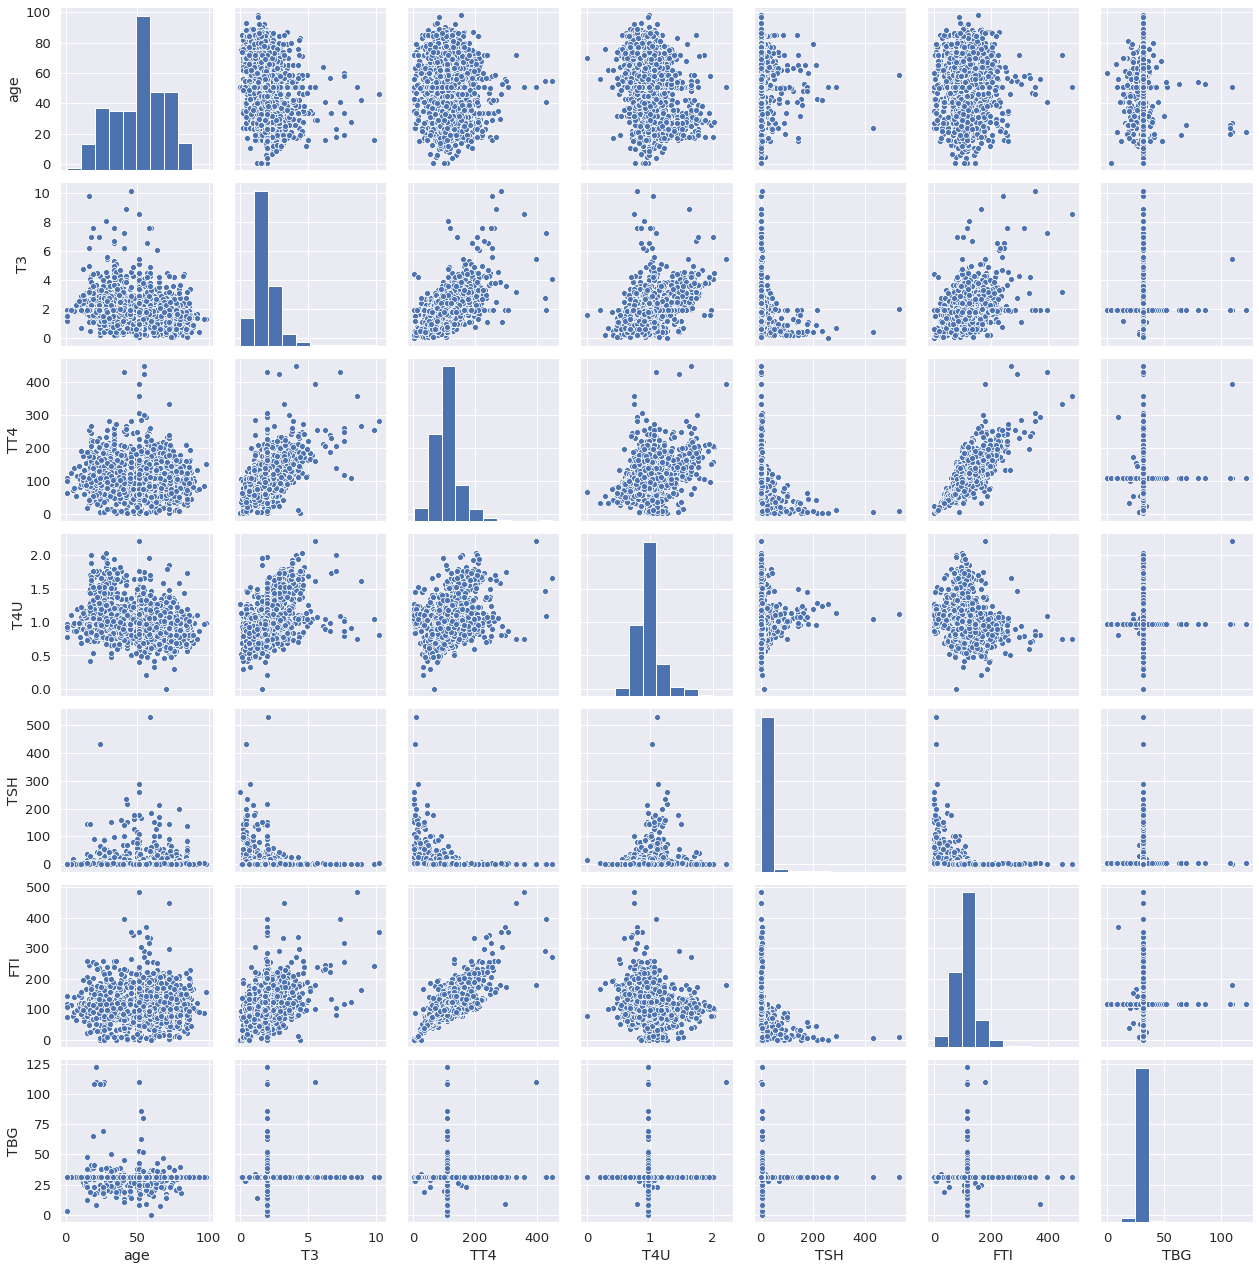

In [549]:
sns.pairplot(cat)

**Plot a heatmap of the numerical variables**

# 4) Modelling

***We are dropping the negative column that we label encoded to avoid the dummy trap***

In [550]:
# Split data into Features and Labels
#
y = hypoT['status']
X = df_encoded

y = pd.get_dummies(y)
y.drop(['negative'], axis=1)

y = y.iloc[:, :1]

# print the size of X and y
#
X.shape, y.shape

((3013, 43), (3013, 1))

In [0]:
# Split the data into train set and test set.
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [0]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {
    "n_estimators":[5,10]
}

rf.fit(X_train,y_train.values.ravel())

y_pred_rfc = rf.predict(X_test)

In [554]:
# Mean Squared Error, Root Mean Squared Error and Mean Absolute Error
#
from sklearn import metrics
import math

print(f" Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred_rfc)}")
print(f" Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred_rfc)}")
print(f" Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfc))}")

 Mean Absolute Error: 1.2736318407960199
 Mean Squared Error: 0.009950248756218905
 Root Mean Squared Error: 0.09975093361076329


In [555]:
# Model Accuracy
#
print(f" Model Accuracy: {metrics.accuracy_score(y_test, y_pred_rfc)*100}%")

 Model Accuracy: 99.00497512437812%


In [556]:
# Check for the feature importances
#
feature_imp=pd.Series(rf.feature_importances_).sort_values(ascending=False)
feature_imp = feature_imp[:10]
print(feature_imp)

0     0.285109
12    0.250928
15    0.231700
3     0.077178
6     0.040638
18    0.035282
26    0.007724
31    0.007628
32    0.007402
25    0.006085
dtype: float64


In [594]:
# Get numerical feature importances
#
importances = list(rf.feature_importances_)
feat = hypoT.iloc[:, 1:].columns

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feat, importances)]

print(feature_importances) # This already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.29), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.08), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.04), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.25), ('TSH_measured', 0.0), ('TSH', 0.0), ('T3_measured', 0.23), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.04), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.0), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: age                  Importance: 0.29
Variable: goitre               Importance: 0.25
Variable: T3_measured          Importance: 0.23
Variable: query_on_thyroxine   Importance: 0.08
Variable: query_hypothyroid    Importance: 0.04
Variable: TT4                  Importance: 0.04
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variabl

No handles with labels found to put in legend.


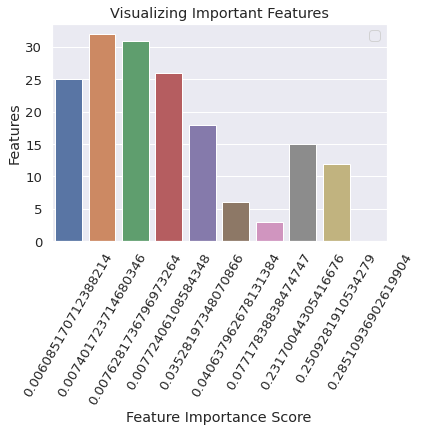

In [596]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.xticks(rotation =60)
plt.legend()
plt.show()

> Therefore after getting the feature importances we clearly see that we only require about 5 features for an effective model. 

> This is because using 12 features gives you the highest feature importance score.

> these features are:

Variable: age -                  Importance: 0.29

Variable: goitre -               Importance: 0.25

Variable: T3_measured -        Importance: 0.23

Variable: query_on_thyroxine -  Importance: 0.08

Variable: query_hypothyroid -   Importance: 0.04

Variable: TT4 -                Importance: 0.04

##### **Cross Validation**

In [558]:
from sklearn.model_selection import cross_val_score

all_accuracies = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=5)

print(f"\n Accuracies: \n{(all_accuracies)*100}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 


 Accuracies: 
[99.17012448 98.9626556  97.71784232 97.30290456 99.79253112]


> ***We can clearly see that our model performed quite well with the accuracies ranging from 97.30% to 99.58%.***

##### **Grid Search for Parameter Selection**

> We want to find which value results in the highest performance for the criterion parameter: "gini" or "entropy"

In [559]:
# Performing a Grid Search.
#
from sklearn.model_selection import GridSearchCV 

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

gd_sr = GridSearchCV(estimator=rf,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

# Call the fit method of the class and pass it the training and test set
#
gd_sr.fit(X_train, y_train)

# Check the parameters that return the highest accuracy.
#
best_parameters = gd_sr.best_params_
print(best_parameters)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 1000}


> To find the best accuracy achieved, we will execute the following code

In [560]:
# Find the best Accuracy.
#
best_result = gd_sr.best_score_
print((best_result)*100)

98.87966804979254


> After performing a grid search on the model we can now be able to find the best possible accuracy, which is 98.87%.

### Ada Boosting

In [0]:
# Split data into Features and Labels
#
y = hypoT['status']
X = df_encoded

y = pd.get_dummies(y)
y.drop(['negative'], axis=1)

y = y.iloc[:, :1]

# print the size of X and y
#
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [562]:
# Import necessary Libraries
#
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Note that adaboost needs a simple decision tree in its constructor. 
#
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=12)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [563]:
# Mean Absolute Error
# Mean Squared Error
# Root Mean Squared Error
#
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))


Mean Absolute Error: 1.6981757877280266
Mean Squared Error: 0.013266998341625208
Root Mean Squared Error: 0.11518245674418134


In [564]:
# Model Evaluation
pred = accuracy_score(y_test, y_pred_ada)
print(f'RBF Model Accuracy: {pred*100} %\n')
print(confusion_matrix(y_test, y_pred_ada))

RBF Model Accuracy: 98.67330016583747 %

[[574   4]
 [  4  21]]


> After performing a Gradient Boosting on the model we can now be able to find the best possible accuracy, which is 98.67%.

### **Gradient boosting**

In [565]:
# Split the data into Features and Labels
#
from sklearn.ensemble import GradientBoostingClassifier

y = hypoT['status']
X = df_encoded
y = pd.get_dummies(y)
y.drop(['negative'], axis=1)
y = y.iloc[:, :1]

X.shape,y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

params = {
      'n_estimators': 3,
      'max_depth': 2,
      'learning_rate': 1,
      'criterion': 'mse'
  }

gbc = GradientBoostingClassifier(**params)

gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [566]:
# Model Evaluation
pred = accuracy_score(y_test, y_pred_gbc)
print(f'RBF Model Accuracy: {pred*100} %\n')
print(confusion_matrix(y_test, y_pred_gbc))

RBF Model Accuracy: 98.8391376451078 %

[[576   2]
 [  5  20]]


> After performing a Gradient Boosting on the model we can now be able to find the best possible accuracy, which is 98.84%.

### Conclusion

> Comparison between Ada Boosting Classifier and Gradient Boosting Classifier shows that the Gradient performs slightly better than Ada Boosting. 

> The marging between the two ensemble methods is jus 0.17% which is not big enough to say that Gradient Boosting is much better than Ada Boosting.

## Support Vector Machines

In [567]:
# First, we need to convert the dataframe into a dictionary.
# This can be achieved by Pandas to_dict method.
#
y = hypoT['status']

df_dict2 = pd.get_dummies(y) # turn each row as key-value pairs.

print(f" Dictionary created:\n {df_dict2}")
# The orient='records' is required to turn the data frame 
# into a {column:value} format.

 Dictionary created:
       hypothyroid  negative
0               1         0
1               1         0
2               1         0
3               1         0
4               1         0
...           ...       ...
3158            0         1
3159            0         1
3160            0         1
3161            0         1
3162            0         1

[3013 rows x 2 columns]


In [568]:
# Split the data into Features and Labels
#
X = df_encoded
y = pd.get_dummies(y)
y.drop(['negative'], axis=1)
y = y.iloc[:, :1]

X.shape,y.shape

((3013, 43), (3013, 1))

### Dimensionality Reduction using PCA Algorithm

In [569]:
# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(X)
X = pca.transform(X)
X.shape

(3013, 2)

### **Radial Basis Function**

In [570]:
# Split the data into train set and test set.
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit our model to X_train and y_train
#
rbf =  SVC(kernel='rbf', gamma='auto')
rbf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

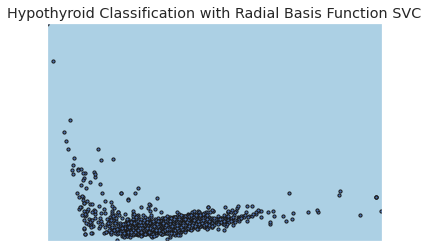

In [584]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.5):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with Radial Basis Function SVC')

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]

xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbf, xx, yy, cmap=plt.cm.Paired, alpha=0.9)

ax.scatter(X0, X1, cmap=plt.cm.Paired, s=10, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [0]:
# making prediction
y_pred = rbf.predict(X_test)

In [572]:
# Model Evaluation
pred = accuracy_score(y_test, y_pred)
print(f'RBF Model Accuracy: {pred*100} %\n')
print(confusion_matrix(y_test, y_pred))

RBF Model Accuracy: 95.85406301824212 %

[[578   0]
 [ 25   0]]


> Using the Support Vector Machine with the rbf kernel, we get a pretty good accuracy for our model. We get a 95.85% accuracy when we perdict using the test dataset.

### **Polynormial function**

In [573]:
# Polynormial
# fit our model to X_train and y_train
#
poly =  SVC(kernel='poly', gamma='auto')
poly.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

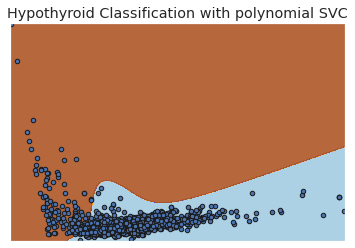

In [588]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.9):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = poly.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with polynomial SVC')

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]

xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, poly, xx, yy, cmap=plt.cm.Paired, alpha=0.9)

ax.scatter(X0, X1, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [0]:
# making prediction
y_pred = poly.predict(X_test)

In [575]:
# Model Evaluation
pred = accuracy_score(y_test, y_pred)
print(f'Polynormial Model Accuracy: {pred*100} %\n')
print(confusion_matrix(y_test, y_pred))

Polynormial Model Accuracy: 97.6782752902156 %

[[568  10]
 [  4  21]]


> Using the Support Vector Machine with the polynormial kernel, we get a pretty good accuracy for our model. We get a 97.68% accuracy when we perdict using the test dataset.

### **Sigmoid Function**

In [576]:
# Polynormial
# fit our model to X_train and y_train
#
sig =  SVC(kernel='sigmoid', gamma='auto')
sig.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

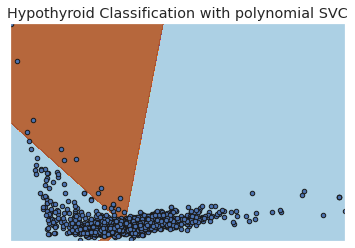

In [585]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.5):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = sig.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with polynomial SVC')

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]

xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, sig, xx, yy, cmap=plt.cm.Paired, alpha=0.9)

ax.scatter(X0, X1, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [0]:
# making prediction
y_pred = sig.predict(X_test)

In [578]:
# Model Evaluation
pred = accuracy_score(y_test, y_pred)
print(f'Sigmoid Model Accuracy: {pred*100} %\n')
print(confusion_matrix(y_test, y_pred))

Sigmoid Model Accuracy: 91.54228855721394 %

[[550  28]
 [ 23   2]]


### SVM Conclusion

We observe that Polynomial model has the best peformance, with the sigmoid model being the porest performer at 91%.

Therefore we conclude that the Polynormial would be the best kernel to use since it leads to a higher model accuracy.

# 5) Challenging the solution

> Regardless of the Models used giving high accuracy, I would note that more improvements can be done to ensure that you get the correct prediction from the model.

# 6) Follow up questions

### a). Did we have the right data?

> Yes we had the right data, even though the data itself needed to be cleaned in order to provide optimal model performance.

### b). Do we need other data to answer our question?

> At the moment we do not require other data in order to answer our question, even though we might need to update the data in the future.

### c). Did we have the right question?

> The questions we had for the project were the right questions and they enabled us get meaningful insights from the data and also allowed us to build a model with the aim of answering them.